# Final Project Notebook

Use the follow cells prompts to complete the final project for the course. Everything you need should be present in this notebook or previous notebooks we've used in class. You can work together as needed. 

 - You will need to name your own dataset and use that name throughout
 - There are sections where you need to make changes the code and insert new code this will be noted in the code provided
 - You may get frustrated along the way, this is totally normal, just remember even small changes to the code make a huge difference. 

## Question Fork the Repository
i. Include a screenshot of the forked repo in your GitHub account

To fork the repository:
1. Go to https://github.com/NovaVolunteer/ds1001_final
2. Click the "Fork" button in the top right corner
3. The repo will be forked to your GitHub account
4. Take a screenshot of your forked repository

### You should now be able to open your cloned repo in google collab, use the code below. 

### It's very helpful to have the variable inspector open while you go through this process. To do so go to tools>command palette>show variable inspector

### It's also helpful to open up the folder tree on the left menu bar. Just click on the folder icon and then the ds1001_final folder. The data is located in the data folder in the processed sub-folder. 

In [6]:
!git clone "https://github.com/akshaj27-hue/ds1001_final"
# This script clones a GitHub repository using Git command line tool. 
# Insert the path to your desired repository in place of the URL.

fatal: could not create work tree dir 'ds1001_final': Permission denied


## Systems

In [2]:
# Activate the finalproj environment
!source ds1001_final/ds1001_final/finalproj/bin/activate

/bin/bash: line 1: ds1001_final/ds1001_final/finalproj/bin/activate: No such file or directory


In [3]:
### You can use this command to list all the packages in your environment
!pip list

Package                   Version
------------------------- -----------
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
Automat                   25.4.16
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.3.0
certifi                   2025.10.5
cffi                      2.0.0
charset-normalizer        3.4.4
colorama                  0.4.6
comm                      0.2.3
constantly                23.10.4
contourpy                 1.3.3
cryptography              46.0.3
cssselect                 1.3.0
cycler                    0.12.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fairlearn                 0.13.0
fastjsonschema            2.21.2
filelock                  3.19.1
fonttools   

In [4]:
!pip install "XX"

#You'll likely need to install the fairlearn packages, if not already installed.
#Are there additional packages to install? (Cross check with the list above to 
# ensure all packages are installed)

In [5]:
import sys
print(sys.executable)

import fairlearn
import sklearn
print("fairlearn OK, sklearn OK")


/home/codespace/.python/current/bin/python
fairlearn OK, sklearn OK


In [6]:
import sklearn
sklearn.__version__


'1.7.2'

### Check !pip list again to confirm installations

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import fairlearn.metrics
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import count, true_positive_rate, false_positive_rate, selection_rate, demographic_parity_ratio


In [8]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:           7.8Gi       2.7Gi       289Mi        59Mi       5.2Gi       5.1Gi
Swap:             0B          0B          0B


In [9]:
!df -h /


Filesystem      Size  Used Avail Use% Mounted on
overlay          32G   13G   18G  41% /


In [10]:
df_before = df.copy()
df_before.shape

NameError: name 'df' is not defined

## Design: Data prep and exploration 

In [21]:
import pandas as pd

df = pd.read_csv("../data/adult.csv")  # this loads the dataset
df


FileNotFoundError: [Errno 2] No such file or directory: '../data/adult.csv'

In [11]:
import os
os.getcwd()


'/workspaces/ds1001_final/ds1001_final/notebooks'

In [12]:
os.listdir("..")


['data',
 'tests',
 'LICENSE',
 'reports',
 'notebooks',
 'Makefile',
 '.gitignore',
 'requirements.txt',
 'models',
 'scripts',
 'finalproj',
 'references',
 'docs',
 'README.md',
 'pyproject.toml']

In [13]:
os.listdir("../data")

['interim', 'raw', 'processed', 'external']

In [14]:
os.listdir("../data/raw")

['.gitkeep']

In [15]:
os.listdir("../data/processed")

['bank_final.csv', '.gitkeep']

In [16]:
os.listdir("../data/interim")

['.gitkeep']

In [17]:
os.listdir("../data/external")

['.gitkeep']

In [11]:
import pandas as pd

df = pd.read_csv("../data/processed/bank_final.csv")
df.head()


,age,job,marital,education,race,default,balance,housing,contact,duration,contactndays,signed up,gender
0,43,self-employed,married,tertiary,white,no,64,no,unknown,230,-1,0,m
1,74,retired,married,primary,white,no,5539,no,cellular,253,181,0,m
2,33,management,married,tertiary,hispanic,no,373,no,cellular,384,-1,0,m
3,37,blue-collar,married,secondary,asian,no,934,no,unknown,258,-1,0,m
4,30,technician,married,tertiary,white,no,1,no,cellular,69,-1,0,f


In [19]:
# How many rows and columns?
df.shape

(43628, 13)

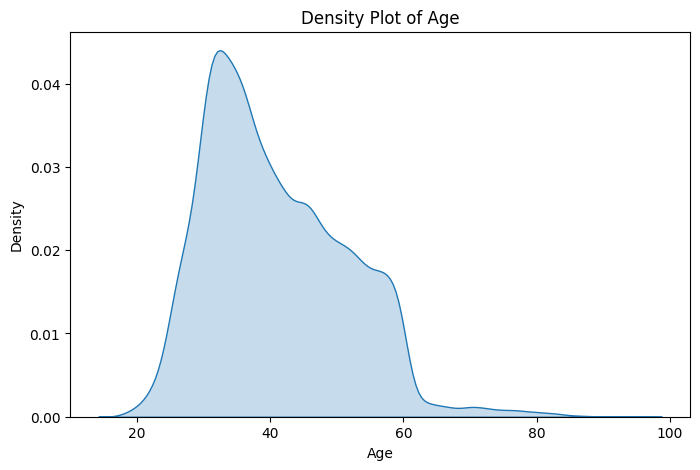

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='age', fill=True)
plt.title("Density Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


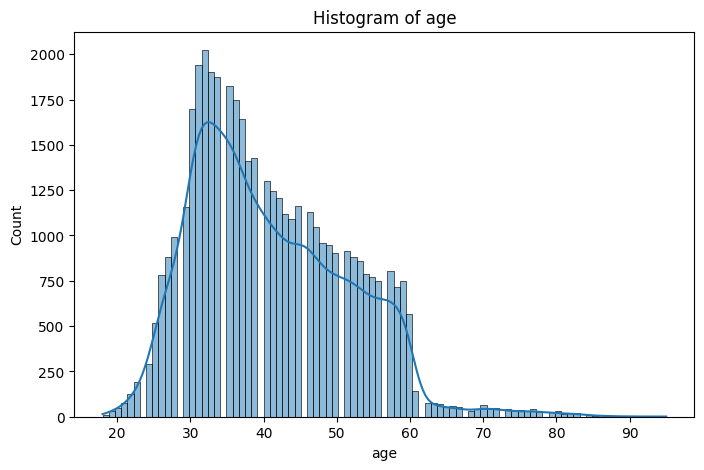

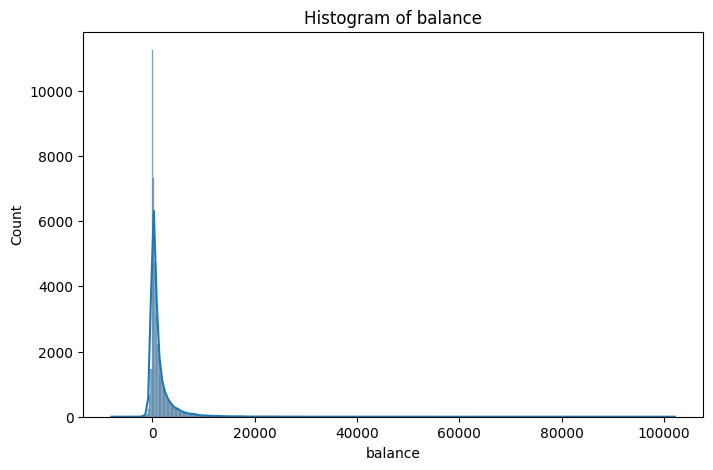

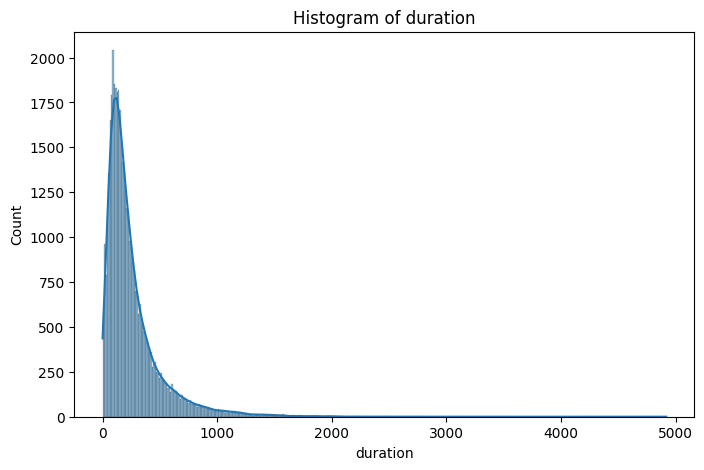

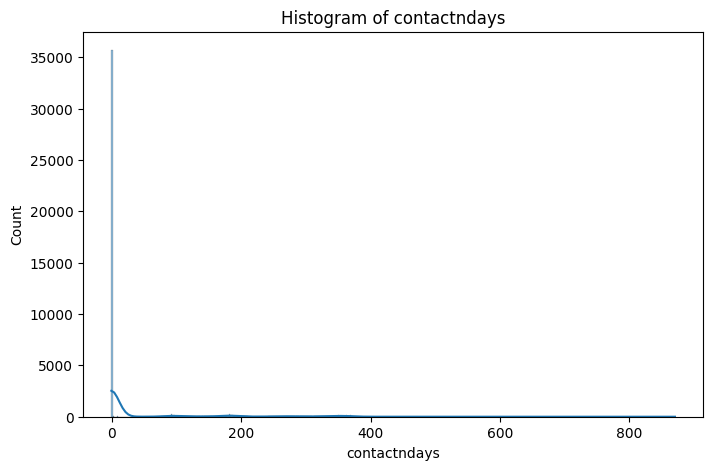

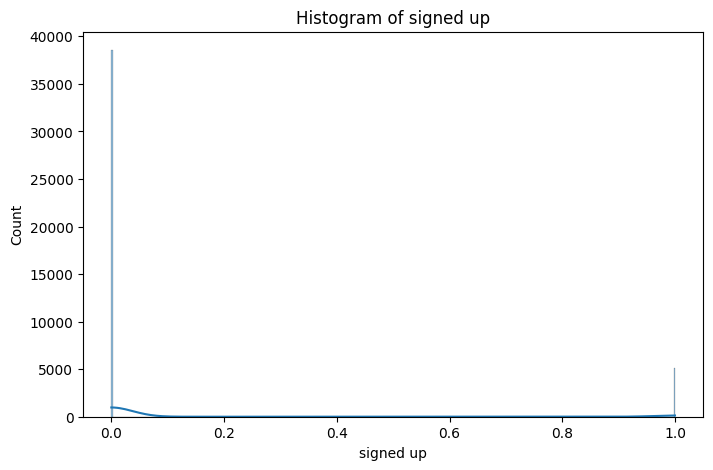

In [12]:
# Histograms for numeric variables
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


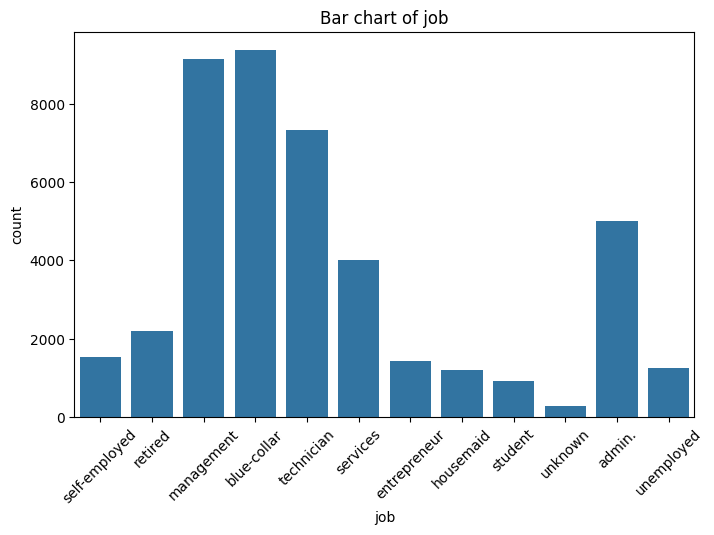

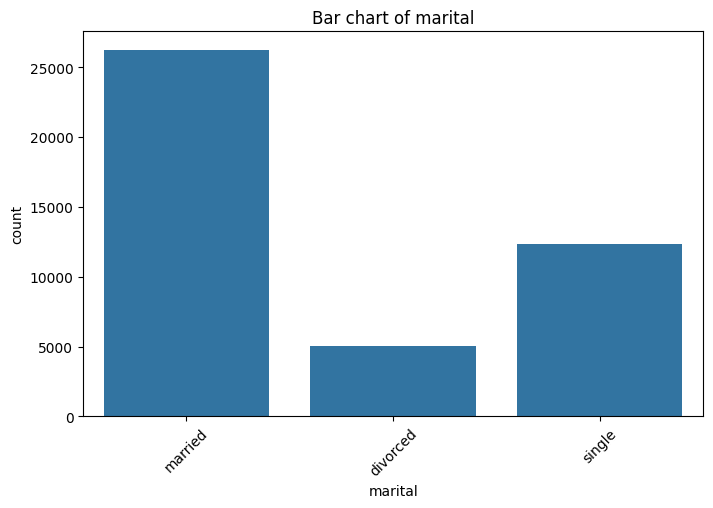

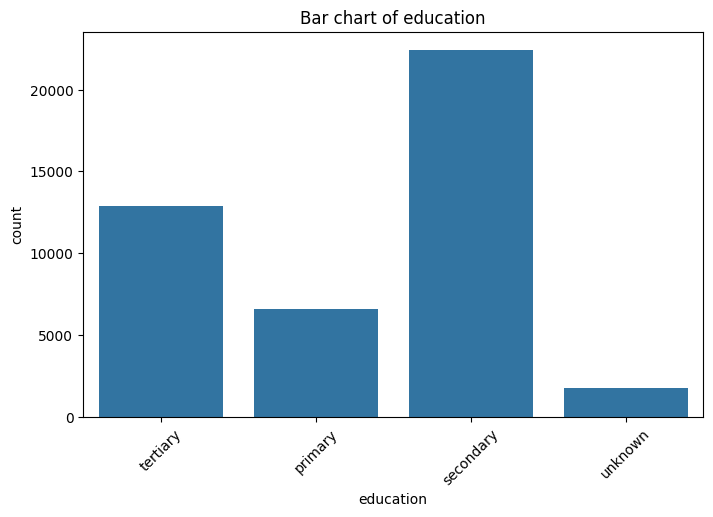

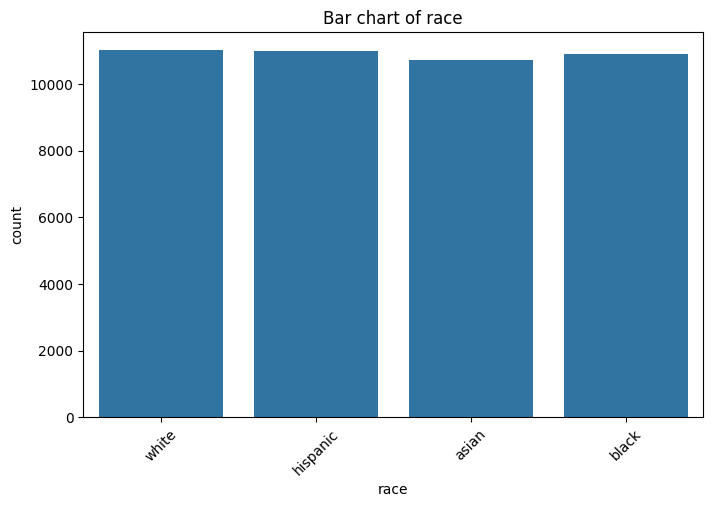

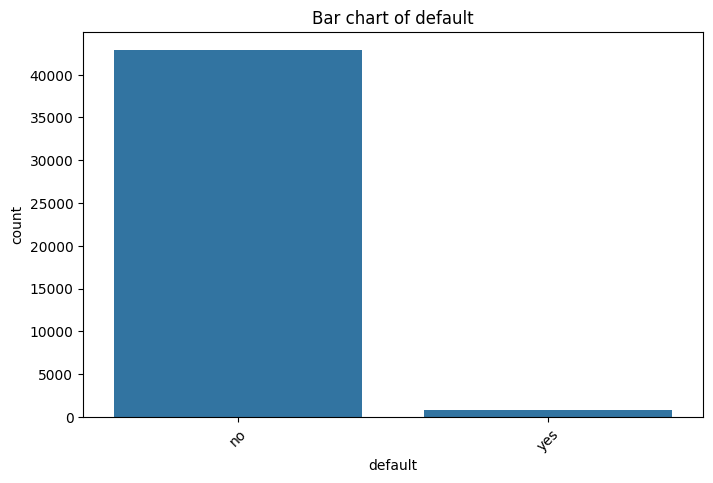

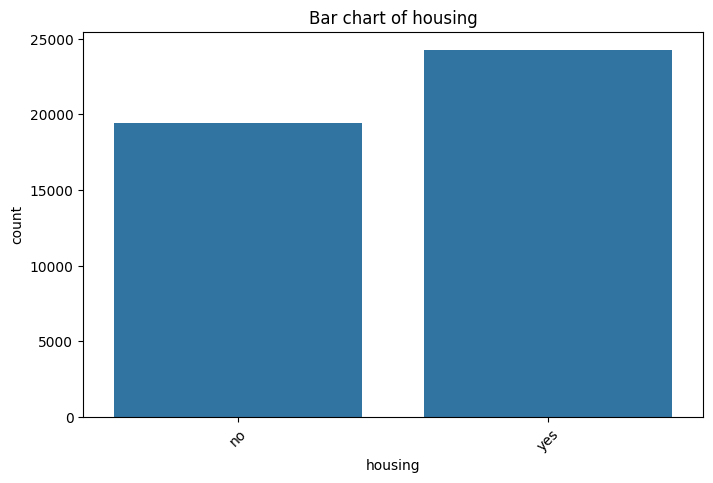

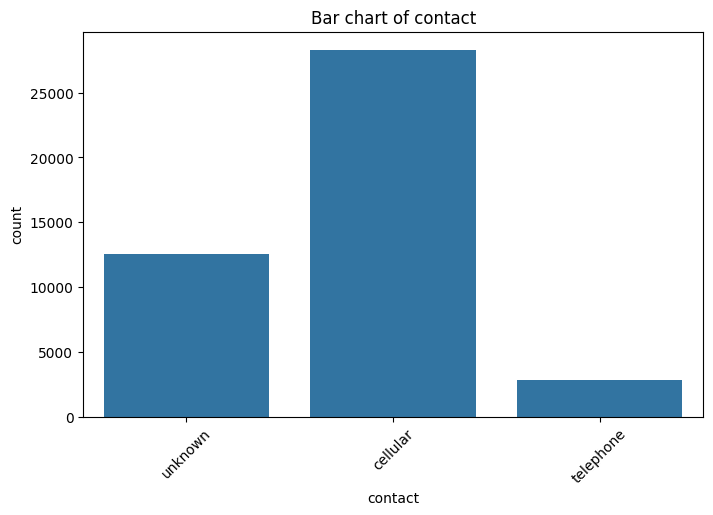

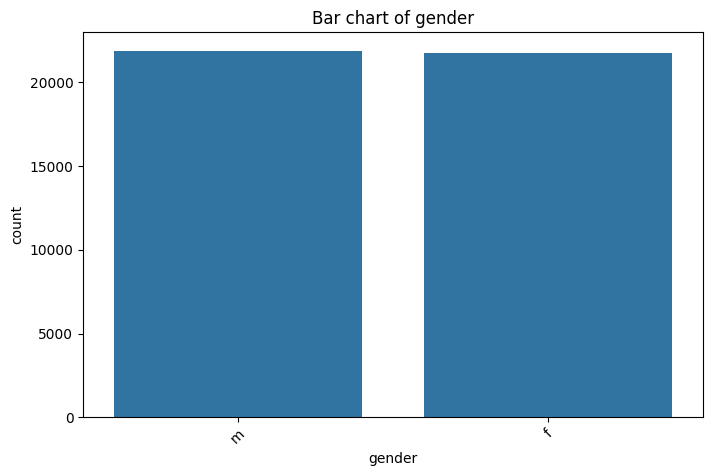

In [23]:
# Bar charts for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col])
    plt.title(f'Bar chart of {col}')
    plt.xticks(rotation=45)
    plt.show()


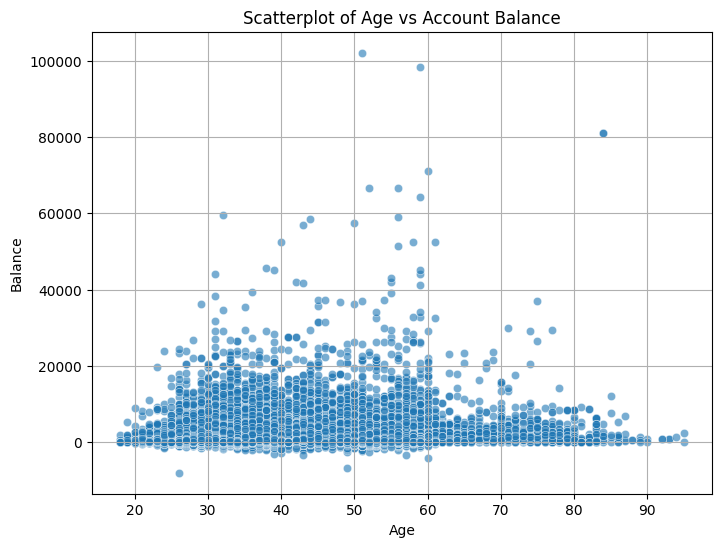

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df is defined (reload if needed)
df = pd.read_csv("../data/processed/bank_final.csv")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='balance', alpha=0.6)
plt.title("Scatterplot of Age vs Account Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.grid(True)
plt.show()


In [24]:
# Normalize numeric columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,age,job,marital,education,race,default,balance,housing,contact,duration,contactndays,signed up,gender
0,0.324675,self-employed,married,tertiary,white,no,0.073384,no,unknown,0.046767,0.000000,0.0,m
1,0.727273,retired,married,primary,white,no,0.123091,no,cellular,0.051444,0.208716,0.0,m
2,0.194805,management,married,tertiary,hispanic,no,0.076190,no,cellular,0.078081,0.000000,0.0,m
3,0.246753,blue-collar,married,secondary,asian,no,0.081283,no,unknown,0.052460,0.000000,0.0,m
4,0.155844,technician,married,tertiary,white,no,0.072812,no,cellular,0.014030,0.000000,0.0,f


In [25]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [18]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,age,balance,duration,contactndays,signed up,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_tertiary,education_unknown,race_black,race_hispanic,race_white,default_yes,housing_yes,contact_telephone,contact_unknown,gender_m
0,43,64,230,-1,0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
1,74,5539,253,181,0,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,33,373,384,-1,0,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True
3,37,934,258,-1,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,30,1,69,-1,0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [20]:
# Use only numeric / boolean columns for modeling
df_model = df.select_dtypes(include=['number', 'bool']).copy()

# Set the target and features  🔹 NOTE THE SPACE: 'signed up'
target = df_model['signed up']
features = df_model.drop(columns=['signed up'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)



In [21]:
# Define target and features
target = df['signed up']
features = df.drop(columns=['signed up'])

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

len(X_train), len(X_test)


(34902, 8726)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_results = {}

for k in range(1, 21):  # trying k from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_test, y_test)
    accuracy_results[k] = accuracy

accuracy_results

{1: 0.8530827412330965,
 2: 0.881503552601421,
 3: 0.8771487508595004,
 4: 0.8862021544808618,
 5: 0.8820765528306211,
 6: 0.8866605546642219,
 7: 0.8853999541599816,
 8: 0.8847123538849415,
 9: 0.8833371533348613,
 10: 0.8841393536557415,
 11: 0.8843685537474215,
 12: 0.8845977538391016,
 13: 0.8847123538849415,
 14: 0.8824203529681411,
 15: 0.8829933531973413,
 16: 0.8831079532431813,
 17: 0.8832225532890213,
 18: 0.8834517533807014,
 19: 0.8847123538849415,
 20: 0.8844831537932615}

In [24]:
!pip install tabulate
from tabulate import tabulate

before_rows, before_cols = 43628, 13
after_rows, after_cols = df.shape
difference = after_cols - before_cols

table_data = [
    ["Number of Rows", before_rows, after_rows, after_rows - before_rows],
    ["Number of Columns", before_cols, after_cols, difference]
]

print(tabulate(table_data, headers=["Metric", "Before Encoding", "After Encoding", "Difference"], tablefmt="grid"))


+-------------------+-------------------+------------------+--------------+
| Metric            |   Before Encoding |   After Encoding |   Difference |
+===================+===================+==================+==============+
| Number of Rows    |             43628 |            43628 |            0 |
+-------------------+-------------------+------------------+--------------+
| Number of Columns |                13 |               29 |           16 |
+-------------------+-------------------+------------------+--------------+


In [29]:
best_k = max(accuracy_results, key=accuracy_results.get)
best_k

2

In [30]:
best_k = 2
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


In [20]:
# Explore the variables a bit more, create histograms for the numerics values and bar charts for the categorical.
# Histograms for numeric variables
numeric_columns = "xx".select_dtypes(include=['number']).columns
for col in numeric_columns: 
    plt.figure(figsize=(10, 6))
    sns.histplot("xx"[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()  



AttributeError: 'str' object has no attribute 'select_dtypes'

In [ ]:
# Bar charts for categorical variables
categorical_columns = "xx".select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x="xx"[col])
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# How many numeric columns are in the data set?
num_numeric_columns = "xx".select_dtypes(include=['number']).shape[1]

In [ ]:
# Normalization
scaler = MinMaxScaler()
"xx"["xx".select_dtypes(include=['number']).columns] = scaler.fit_transform("xx".select_dtypes(include=['number']))

In [ ]:
# Likely need to convert categorical columns to category dtype
for col in "xx".select_dtypes(include=['object']).columns:
    "xx"[col] = "xx"[col].astype('category')   

In [ ]:
# Creating dummy variables, make sure the variables that need to be converted to dummies are categorical, not numeric.
# This might require you to convert some columns to categorical first using astype('category')
"xx" = pd.get_dummies("xx", drop_first=True)

In [ ]:
# Display missing data using the isnull function, is there any missing data?
print("xx".isnull().sum())

In [ ]:
# remove missing values if needed
"xx" = "xx".dropna()

In [ ]:
# Scatterplot between two continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Variable1', y='Variable2', data="xx")  # Replace 'Variable1' and 'Variable2' with your column names
plt.title('Scatterplot of Variable1 vs Variable2')
plt.savefig('scatterplot.png')  # Save the scatterplot image
plt.show()

In [ ]:
# Density chart of a continuous variable
plt.figure(figsize=(10, 6))
sns.kdeplot("xx"['ContinuousVariable'], fill=True)  # Replace 'ContinuousVariable' with your column name
plt.title('Density Chart of ContinuousVariable')
plt.show()

In [ ]:
#Correlation matrix, make sure to only include numeric variables
num_values = "xx".select_dtypes(include=['number'])
correlation_matrix = num_values.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Analytics: Build a model and Tune it for best Best Performance

In [ ]:
# What is the ‘target’ of a model and what is the prevalence of the target in your dataset? Remember prevalence 
# is the proportion of records that take on the value of interest for the target variable, usually the positive class.
target_prevalence = "xx"['TargetVariable'].sum()  # Replace 'TargetVariable' with your target column name
print(f'Target Prevalence: {target_prevalence}')

In [ ]:
# Divide the dataset into features and target
target = "xx"['TargetVariable']  # Replace 'TargetVariable' with your actual target column name and "xx" with your dataframe name
features = "xx".drop(columns=['TargetVariable']) # Drop the target column from features


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Include your table for the 10 values of k you tried and the corresponding accuracies.

accuracy_results = {}

# Replace x with your desired range values, explain what is happening in this loop
for k in range(x, x):  
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_test, y_test)
    accuracy_results[k] = accuracy

In [ ]:
#graph of accuracy vs k values
plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title('KNN Accuracy vs K Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(list(accuracy_results.keys()))
plt.grid()
plt.show()

In [ ]:
# using the hyperparameter k that gave the best accuracy, rerun the model and generate 
# predictions on the test set. Explain why you choose this k value.
best_k = 'xx'  # Replace 'xx' with the best k value found
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)  

## Value: Evaluation and Protected Classes

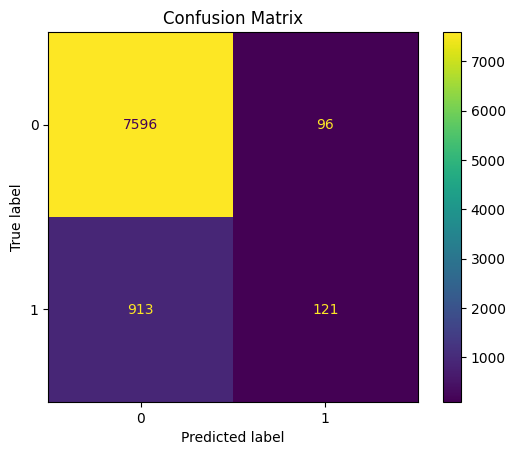

In [31]:
# create a confusion matrix for your model's predictions. 
# What does the confusion matrix tell you about your model's performance?
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [32]:
my_metrics = {
    'true positive rate' : true_positive_rate,
    'false positive rate' : false_positive_rate,
    'selection rate' : selection_rate,
    'count' : count
}

# example: treat "race_hispanic" as one protected class for now
mf_race = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test["race_hispanic"]   # 0/1 indicator
)

mf_gender = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test["gender_m"]        # 0/1 indicator
)


In [33]:
mf_race.by_group #What do the results show? Change the mf_race with each subgroup and report the findings. This means
# you should run this cell multiple times, once for each of the levels in the race variable.

,true positive rate,false positive rate,selection rate,count
race_hispanic,,,,
False,0.118863,0.012745,0.025228,6580.0
True,0.111538,0.011665,0.023765,2146.0


In [34]:
mf_gender.by_group #What do the results show? There's only two groups here so we don't need to change anything. 
# in the metric frame.

,true positive rate,false positive rate,selection rate,count
gender_m,,,,
False,0.117117,0.012645,0.025971,4351.0
True,0.116910,0.012320,0.023771,4375.0


In [ ]:
# Derived fairness metrics. Be sure you understand the scale and meaning of these. Here we are calculating the 
# two fairness ratios using the gender_m feature, which is bi-variate. What do the results show, is the model more or 
# less fair with this grouping?

dpr_gender = fairlearn.metrics.demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test['gender_m'])
print("Demographic Parity ratio:\t", dpr_gender)

eodds_gender = fairlearn.metrics.equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test['gender_m'])
print("Equalized Odds ratio:\t\t", eodds_gender)

In [ ]:
# Derived fairness metrics. Be sure you understand the scale and meaning of these. Here we are calculating the 
# the same features above only using a filtered search to pull in all the possibilities of features
# starting with "race". What do the results show, is the model more or less fair with this grouping?

dpr_race = fairlearn.metrics.demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test.filter(regex="race.*"))
print("Demographic Parity ratio:\t", dpr_race)

eodds_race = fairlearn.metrics.equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test.filter(regex="race.*"))
print("Equalized Odds ratio:\t\t", eodds_race)

In [25]:
#Optional code to add, commit, and push changes to your GitHub repository
!git add .
!git commit -m "Insert Message Here" # This will commit your changes to git. 
!git push # This will push your changes to back to your remote repository on GitHub.

[main f4db79e] Insert Message Here
 1 file changed, 1718 insertions(+), 36 deletions(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (5/5), 368.27 KiB | 13.15 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/robertb24/ds1001_final
   dc46059..f4db79e  main -> main
